# Liquid Mixtures

Liquid mixtures are distinguished from their gaseous counterparts by their density, which can be much higher in general than typical gaseous mixtures. There are circumstances where the cubic form of the mixture equation of state has quantitative predictive power:

1. The mixture is formed from simple alkanes

2. A mixture of liquids with light gases

For most other circumstances a different approach is necessary. For these scenarios, we must employ an alternative strategy - one based on measurement data. For these purposes, we will define an **Excess Property** as:

$$\bar{\theta}^{ex}=\bar{\theta}_i-\underline{\theta}_i$$

In this way the excess property represents the deviation from idael mixing. Determining excess properties of liquids comes from experimental data. The most common of which are made a known temperature and pressure as a function of composition and include:

1. Density Measurements of mixtures

2. Calorimetric Measurements of the heat of mixing


## Excess Molar Volume

A simple density measurement can be used to determine the excess molar volume. Take for example a mixture of water (1) and methanol (2) at $T=298.15\;K$.

### first lets plot the density data as a function of composition

Text(0.5, 0, '$x_1$')

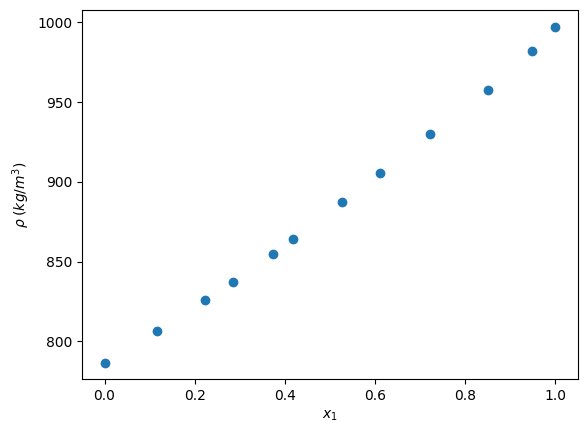

In [12]:
import numpy as np
import matplotlib.pyplot as plt


x1=np.asarray([0,0.1162,0.2221,0.2841,0.3729,0.4186,0.5266,0.6119,0.7220,0.8509,0.9489,1.0])
rho=np.asarray([786.846,806.655,825.959,837.504,855.031,864.245,887.222,905.376,929.537,957.522,981.906,997.047]) #kg/m^3

plt.plot(x1,rho,marker='o',linestyle='')
plt.ylabel(r'$\rho\; (kg/m^3)$')
plt.xlabel(r'$x_1$')

### Now lets calculated the molar volume of the mixture:

$$\underline{V}=\dfrac{\bar{M}_W}{\rho}$$

where $\bar{M}_W=\sum_{i} x_i M_{W}^i$

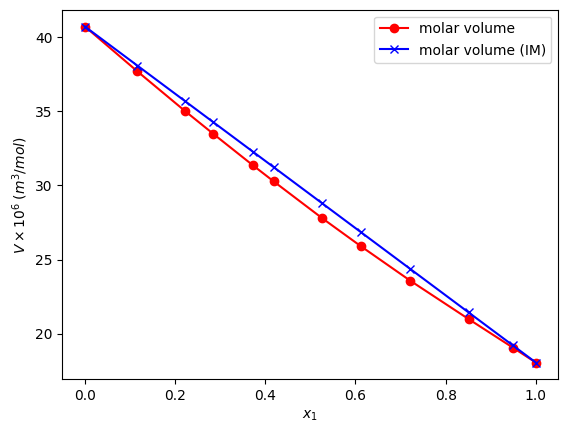

In [28]:
MW1=18    ##g/mol
MW2=32.04 ##g/mol

MW=x1*MW1/1000+(1-x1)*MW2/1000 #kg/mol
V_=MW/rho

VIM=x1*V_[-1]+(1-x1)*V_[0]

plt.plot(x1,V_*10**6,'ro',linestyle='-',label='molar volume')
plt.plot(x1,VIM*10**6,'bx',linestyle='-',label='molar volume (IM)')
plt.ylabel(r'$V \times 10^6 \; (m^3/mol)$')
plt.xlabel(r'$x_1$')
plt.legend()

### Now we Compute the Volume Change on Mixing

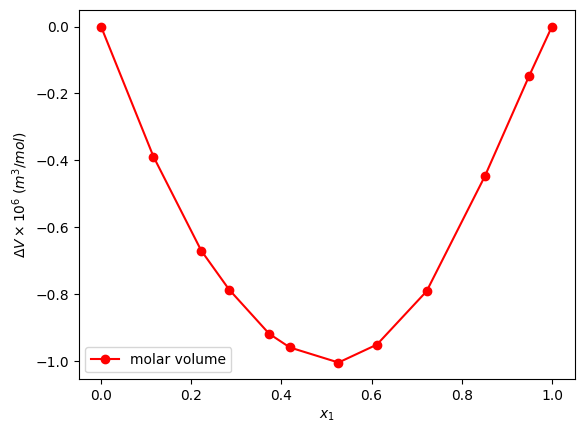

In [32]:
dV_=V_-VIM
plt.plot(x1,dV_*10**6,'ro',linestyle='-',label='molar volume')
#plt.plot(x1,VIM*10**6,'bx',linestyle='-',label='molar volume (IM)')
plt.ylabel(r'$\Delta V \times 10^6 \; (m^3/mol)$')
plt.xlabel(r'$x_1$')
plt.legend()


### Next we compute the partial molar property

To do so, we need to take the derivative of the points. This can be done numerically, but as you can see above our data is sparse (and expensive to measure) so instead of taking the numerical derivative, we will apply the Redlich-Kister equation which is valid for any mixture property. It is expressed as:

$$\Delta_{mix} \theta=x_1 x_2 \sum_n a_n(x_1-x_2)^n$$

This is a polynomial expansion that has the following properties.

1. It is zero when $x_1=0$ or $x_2=0$

2. The 0th order term is symmetric about $x_1=0.5$

For fitting it is convenient to do some rearrangment. Lets plot:

$\dfrac{\Delta_{mix}\theta}{x_1 x_2}$ vs. $\sum_n a_n(x_1-x_2)^n$


[ 0.77451871  0.69242059 -0.19867978 -4.01706834]


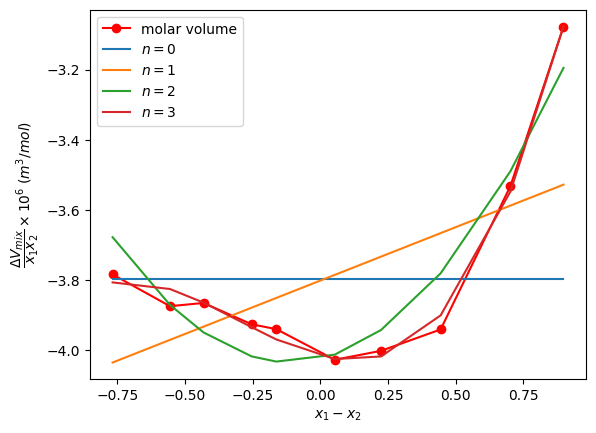

In [71]:
x2=1-x1
#from np.polynomial import polynomial
#Polynomial?

mask=(x1>0) & (x2>0)
plt.plot(x1[mask]-x2[mask],dV_[mask]/(x1[mask]*x2[mask])*10**6,'ro',linestyle='-',label='molar volume')
for n in np.arange(4):
    p_=np.polyfit(x1[mask]-x2[mask],dV_[mask]/(x1[mask]*x2[mask])*10**6,deg=n)
    if(len(p_)>0):
        ans=np.zeros(len(x1))
        for i,p in enumerate(p_):
            #print(i)
            ans[mask]+=p*(x1[mask]-x2[mask])**(n-i)
    else:
        ans=np.ones(len(x1))*p_[0]
    plt.plot(x1[mask]-x2[mask],ans[mask],label=r'$n=%g$'%n)

print(p_)    
#plt.plot(x1,VIM*10**6,'bx',linestyle='-',label='molar volume (IM)')
plt.ylabel(r'$\dfrac{\Delta V_{mix}}{x_1 x_2} \times 10^6 \; (m^3/mol)$')
plt.xlabel(r'$x_1-x_2$')
plt.legend()


### Finally, compute the excess molar volume

$\quad \bar{V}_1-\underline{V}_1=x_2^2\sum_n a_n\big[(x_1-x_2)^n+2nx_1(x_1-x_2)^{n-1}\big]$

The above equation can be directly evaluated and then the **Gibbs Duhem Equation** used to directly evaluate the molar excess property for species (2). 

## Gibbs-Dugem Equation

The partial molar properties are not independent of one another. This can be shown rigorously through derivation or by simple degrees of freedom arguments. For any mixture at a constant $T$ and $P$ it can be shown that the relationship linking the partial molar properties together is given as:

$$\sum_i^C x_i d \bar{\theta}_i\bigg|_{T,P}=0$$

which for a binary mixture is given as:

$$x_1\bigg(\dfrac{\partial \bar{\theta}_1}{\partial x_1}\bigg)_{T,P}+x_2\bigg(\dfrac{\partial \bar{\theta}_2}{\partial x_1}\bigg)_{T,P}=0$$

we can see now how we can use a relatively limited data set to obtain partial molar properties for both species

## Molar Enthalpy Change on Mixing
